In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import Column, Integer, String, Float

In [4]:
# create engine to hawaii.sqlite
#database_path = "hawaii.sqlite"
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Measurement

sqlalchemy.ext.automap.measurement

In [8]:
Station = Base.classes.station
Station

sqlalchemy.ext.automap.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)
session

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
latestDate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latestDate

('2017-08-23')

In [11]:
#extract string from query object
latestDate = list(np.ravel(latestDate))[0]
#convert date string to datetime object
latestDate = dt.datetime.strptime(latestDate, '%Y-%m-%d')

#extract year, month, and day as integers
latestYear = int(dt.datetime.strftime(latestDate, '%Y'))
latestMonth = int(dt.datetime.strftime(latestDate, '%m'))
latestDay = int(dt.datetime.strftime(latestDate, '%d'))

#calculate one year before latest date
yearBefore = dt.date(latestYear, latestMonth, latestDay) - dt.timedelta(days=365)



In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
precipitation = (session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > yearBefore).\
    order_by(Measurement.date).all())
precipitation


[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [17]:

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(precipitation)
prcp_df1 = prcp_df.set_index("date")

# Sort the dataframe by date
prcp_df1 = prcp_df1.sort_index(ascending=True)
prcp_df1.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


<AxesSubplot:xlabel='Date', ylabel='Inches'>

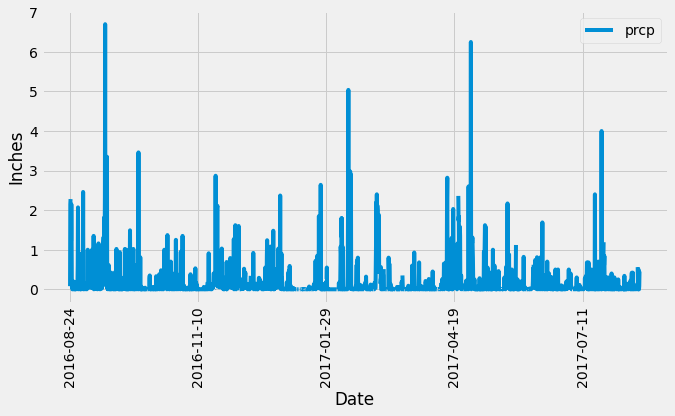

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
chart = prcp_df1.plot(xlabel="Date", ylabel="Inches", figsize=(10,5), legend="Precipitation", rot="vertical" )
chart

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df1.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number stations in the dataset
stations_Count = session.query(Station.station).order_by(Station.station.desc()).count()
stations_Count

9

In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_Counts = session.query(Measurement.station, Measurement.tobs).\
    order_by(Measurement.station.desc()).all()
station_Counts


[('USC00519523', 75.0),
 ('USC00519523', 75.0),
 ('USC00519523', 77.0),
 ('USC00519523', 75.0),
 ('USC00519523', 75.0),
 ('USC00519523', 72.0),
 ('USC00519523', 68.0),
 ('USC00519523', 63.0),
 ('USC00519523', 69.0),
 ('USC00519523', 72.0),
 ('USC00519523', 68.0),
 ('USC00519523', 61.0),
 ('USC00519523', 60.0),
 ('USC00519523', 65.0),
 ('USC00519523', 68.0),
 ('USC00519523', 68.0),
 ('USC00519523', 70.0),
 ('USC00519523', 77.0),
 ('USC00519523', 74.0),
 ('USC00519523', 67.0),
 ('USC00519523', 70.0),
 ('USC00519523', 66.0),
 ('USC00519523', 75.0),
 ('USC00519523', 72.0),
 ('USC00519523', 65.0),
 ('USC00519523', 76.0),
 ('USC00519523', 69.0),
 ('USC00519523', 71.0),
 ('USC00519523', 65.0),
 ('USC00519523', 69.0),
 ('USC00519523', 72.0),
 ('USC00519523', 68.0),
 ('USC00519523', 66.0),
 ('USC00519523', 65.0),
 ('USC00519523', 68.0),
 ('USC00519523', 65.0),
 ('USC00519523', 76.0),
 ('USC00519523', 63.0),
 ('USC00519523', 71.0),
 ('USC00519523', 70.0),
 ('USC00519523', 66.0),
 ('USC00519523',

In [22]:
station_df = pd.DataFrame(station_Counts)
station_df1 = station_df.set_index("station")
station_df1 = station_df1.sort_index(ascending=True)

In [23]:
#Extra: Double check most active station
station_df1.value_counts("station")

station
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
dtype: int64

In [52]:
#set the most active station

#query for station name
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
#query for highest temperature
temp_Max = session.query(Measurement.tobs).\
    filter(Measurement.station == "USC00519281").\
    order_by(Measurement.tobs.desc()).first()
temp_Max = temp_Max[0]
print(f"The maximum temperature recorded was {temp_Max} Farenheit.")

The maximum temperature recorded was 85.0 Farenheit.


In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

temp_Min = session.query(Measurement.tobs).\
    filter(Measurement.station == "USC00519281").\
    order_by(Measurement.tobs).first()
temp_Min = temp_Min[0]
print(f"The minimum temperature recorded was {temp_Min} Farenheit.")

The minimum temperature recorded was 54.0 Farenheit.


In [46]:
temp_Avg =(session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281"))
temp_Avg = '{0:.3}'.format(temp_Avg[0][0]) 
print(f"The average temperature recorded was {temp_Avg } Farenheit.")

The average temperature recorded was 71.7 Farenheit.


In [47]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_Data = (session.query(Measurement.date, Measurement.tobs)
    .filter(Measurement.date > yearBefore)
    .filter(Measurement.station == "USC00519281")
    .order_by(Measurement.date).all())

In [48]:
temp_Data

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [49]:
temp_df = pd.DataFrame(temp_Data)
temp_df1 = temp_df.set_index("date")

# Sort the dataframe by date
temp_df1 = temp_df1.sort_index(ascending=True)
temp_df1.head()

,tobs
date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0


<AxesSubplot:ylabel='Frequency'>

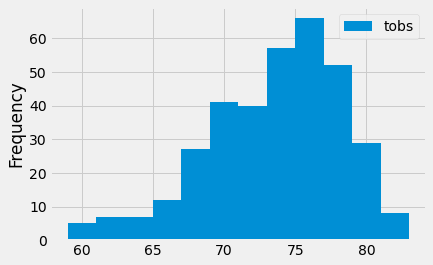

In [50]:
#histogram plot with pandas
temp_df1.plot(kind='hist',xlabel="Temperature", bins=12)

# Close session

In [31]:
# Close Session
session.close()